<font size=7>Plot Weekly Schedule

In this notebook we attempt to build a weekly calendar of when different IoT devices are running. In this approach we get the times of events from the [scheduler](https://schedule.readthedocs.io/en/stable/) we are using to control devices. These events are then plotted by addapting the weekly calendar code [written here](https://github.com/utkuufuk/weekplot/blob/master/weekplot.py).

**References**
* [scheduler documentation](https://schedule.readthedocs.io/en/stable/)
* [weekply plot github](https://github.com/utkuufuk/weekplot)

<font color="red">
    
**To Do**
* Get schedule from multiple iot devices from same experiment
* get more color names in `colors` list

# <font color="gray">Set up notebook

In [3]:
%run "IoT Functions.ipynb"

We must install the latest version of schedule from github

In [ ]:
#!python -m pip install --force-reinstall 'git+https://github.com/dbader/schedule.git'

import the packages that were used to create the [weekly plot](https://github.com/utkuufuk/weekplot/blob/master/weekplot.py)

In [ ]:
#!pip install namedlist
# maybe not needed #!pip install --upgrade matplotlib

In [139]:
#%run "IoT Schedule Functions.ipynb"

import scheduling package and datetime package

import plotly to make schedule look fancy

In [ ]:
#!pip install chart_studio

In [ ]:
#import chart_studio.plotly as py

## How to use time zones

## Update public iot state's schedule

format scheduel information and then upload it.

# <font color="blue">Draw multiple Devices' Schedules

## <font color="green">Final Code

In [38]:
def draw_schedule( device_list ):
    """Draw a weekly schedule of all events that occure for a chose device or experiment"""
    # To Do: figure out how to find all device if given the experiment.
    fig, ax = plt.subplots( figsize=(18, 15) )
    plt.title('Weekly Schedule', y=1, fontsize=16)       # Give the figure a title
    ax.grid(axis='y', linestyle='--', linewidth=0.5)     # Add horizonal grid lines to the plot

    DAYS = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ax.set_xlim(0.5, len(DAYS) + 0.5)
    ax.set_xticks(range(1, len(DAYS) + 1))
    ax.set_xticklabels(DAYS)
    ax.set_ylim( 24, 0)
    ax.set_yticks(range(0, 24))
    ax.set_yticklabels(["{0}:00".format(h) for h in range(0, 24)])
    #plt.savefig('{0}.png'.format(os.path.splitext(sys.argv[1])[0]), dpi=200, bbox_inches='tight')

    # !!! This code should be able to handle experiment types as well as device lists
    # Locally: schedule_str= [f"Job {i}: "+x.__repr__() for i,x in enumerate(schedule.get_jobs())]  #jobs= [job.__str__() for job in schedule.get_jobs()] 
    if type(device_list)==type(""):                    # if single device was passed to the function as a string instead of list, 
        device_list = [device_list]                    # turn it into a list
    colors= ["cornflowerblue","darkorange","mediumpurple","lightgreen"]
    legend_elements = [ Patch(colors[i],colors[i],alpha=0.3) for i in range(len(device_list)) ]
    plt.legend(legend_elements, device_list, bbox_to_anchor=(1.1,1), loc="upper right", prop={'size': 12})       # Add legend  # Show plot
    
    for dev_num, device in enumerate(device_list):
        info = get_info( device )
        jobs, schedule_str = info["jobs"], info["schedule"]

        for i in range(len(jobs)):                             # for each job, we get it's next run time, and run interval for IoT state information
            next_run= datetime.fromisoformat( schedule_str[i].split("next run: ")[1].split(")")[0] )
            period = timedelta(**{ jobs[i].split("unit=")[1].split(",")[0] : int(jobs[i].split("interval=")[1].split(",")[0]) })
            if "UNTIL-" in jobs[i]:                                                           # if there is a specified stop time, use it
                stop_time = datetime.fromisoformat( jobs[i].split("UNTIL-")[1] )
            else:                                                                             # otherwise stop at weekly cycle
                today = (datetime.now() - timedelta(hours=7)).replace(hour=0,minute=0,second=0,microsecond=0) # WARNING: Check Daylight savings
                stop_time =  today + timedelta(weeks=1)   # we will consider all job events that ocure in a week
            job_times = []                   # create a list of all event times for a job
            while next_run < stop_time:
                job_times.append(next_run)
                next_run += period

            for event in job_times:
                d = event.weekday() + 0.52                                                   # get day of week for event
                start = float(event.hour) + float(event.minute) / 60                         # get start time of event
                end = float(event.hour) + (float(event.minute)+15) / 60                      # Ends 15 minutes after start
                plt.fill_between([d, d + 0.96], [start, start], [end, end], color=colors[dev_num],alpha=0.3)
                plt.text(d + 0.02, start + 0.02, '{0}:{1:0>2}'.format(event.hour, event.minute), va='top', fontsize=8)
                plt.text(d + 0.48, start + 0.01, f"Job {i}", va='top', fontsize=8) #ha='center', va='center', fontsize=10)

## <font color="gray">Old Code

In [33]:
def draw_schedule( device_list ):
    """Draw a weekly schedule of all events that occure for a chose device or experiment"""
    # To Do: figure out how to find all device if given the experiment.
    fig, ax = plt.subplots( figsize=(18, 15) )
    plt.title('Weekly Schedule', y=1, fontsize=16)       # Give the figure a title
    ax.grid(axis='y', linestyle='--', linewidth=0.5)     # Add horizonal grid lines to the plot

    DAYS = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ax.set_xlim(0.5, len(DAYS) + 0.5)
    ax.set_xticks(range(1, len(DAYS) + 1))
    ax.set_xticklabels(DAYS)
    ax.set_ylim( 24, 0)
    ax.set_yticks(range(0, 24))
    ax.set_yticklabels(["{0}:00".format(h) for h in range(0, 24)])
    #plt.savefig('{0}.png'.format(os.path.splitext(sys.argv[1])[0]), dpi=200, bbox_inches='tight')

    # !!! this code below should be wrapped in a for loop that allows this to be done with multiple devices
    # Locally: schedule_str= [f"Job {i}: "+x.__repr__() for i,x in enumerate(schedule.get_jobs())]  #jobs= [job.__str__() for job in schedule.get_jobs()] 
    info = get_info( device_experiment )
    jobs, schedule_str = info["jobs"], info["schedule"]

    for i in range(len(jobs)):                             # for each job, we get it's next run time, and run interval for IoT state information
        next_run= datetime.fromisoformat( schedule_str[i].split("next run: ")[1].split(")")[0] )
        period = timedelta(**{ jobs[i].split("unit=")[1].split(",")[0] : int(jobs[i].split("interval=")[1].split(",")[0]) })
        if "UNTIL-" in jobs[i]:                                                           # if there is a specified stop time, use it
            stop_time = datetime.fromisoformat( jobs[i].split("UNTIL-")[1] )
        else:                                                                             # otherwise stop at weekly cycle
            today = (datetime.now() - timedelta(hours=7)).replace(hour=0,minute=0,second=0,microsecond=0) # WARNING: Check Daylight savings
            stop_time =  today + timedelta(weeks=1)   # we will consider all job events that ocure in a week
        job_times = []                   # create a list of all event times for a job
        while next_run < stop_time:
            job_times.append(next_run)
            next_run += period

        for event in job_times:
            d = event.weekday() + 0.52                                                   # get day of week for event
            start = float(event.hour) + float(event.minute) / 60                         # get start time of event
            end = float(event.hour) + (float(event.minute)+15) / 60                      # Ends 15 minutes after start
            plt.fill_between([d, d + 0.96], [start, start], [end, end], color="cornflowerblue",alpha=0.3)
            plt.text(d + 0.02, start + 0.02, '{0}:{1:0>2}'.format(event.hour, event.minute), va='top', fontsize=8)
            plt.text(d + 0.48, start + 0.01, f"Job {i}", va='top', fontsize=8) #ha='center', va='center', fontsize=10)

## <font color="brown">Playground

### Devices Setup

Check that multiple devices are hooked up

In [4]:
send( "pic_1", "sayHello('alice')" )

In [5]:
send( "flow_1", "sayHello('alice')" )

Create a schedueled event for each device

In [6]:
send( "pic_1", """schedule.every().hour.at(":00").do(sayHello, name='hourly,00')""" )
send("flow_1", """schedule.every().hour.at(":30").do(sayHello, name='hourly,30')""" )

### draw calendar

create list of devices to view

In [10]:
from matplotlib.patches import Patch

In [11]:
device_list = ["flow_1","pic_1"]

In [12]:
colors= ["cornflowerblue","darkorange","mediumpurple","lightgreen"]

In [42]:
type("asdf")==type(" ")

True

In [43]:
device_list = "flow_1"

In [ ]:
legend_elements = [Patch("r","r"), Patch("b","b") ]   # Create colors in legend

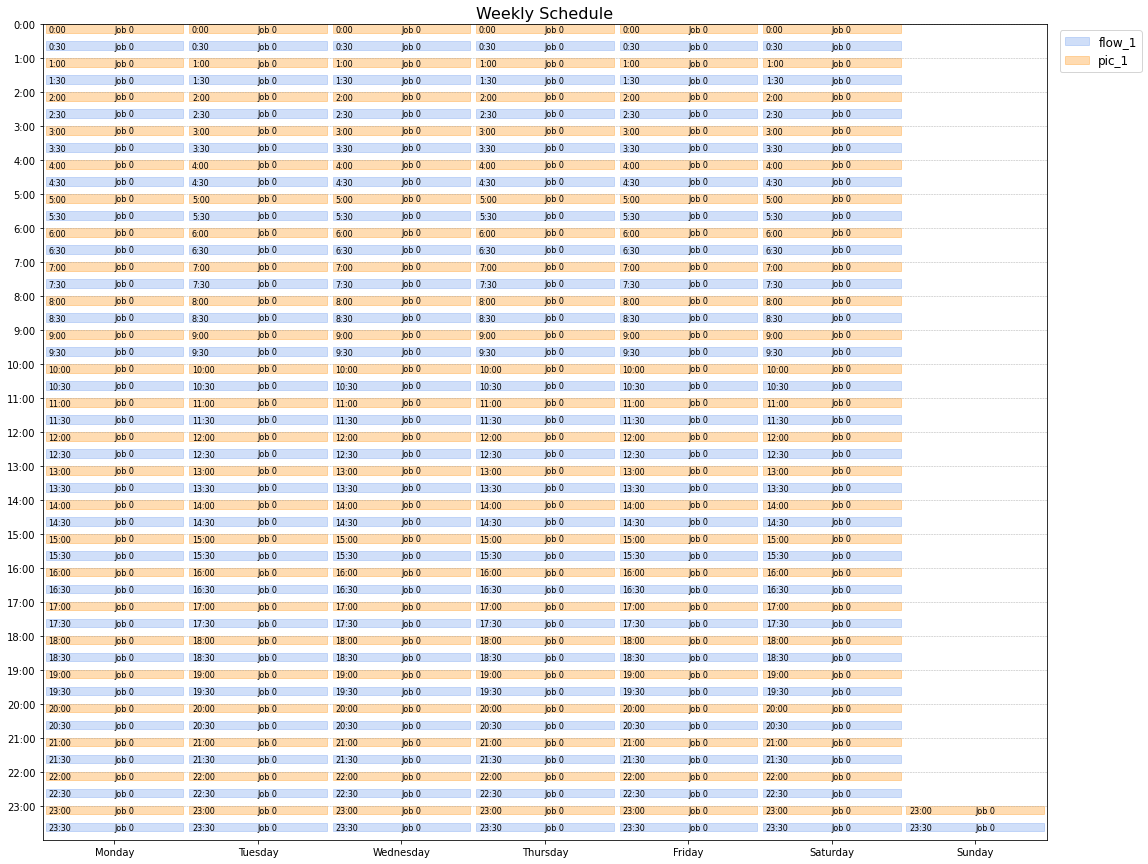

In [39]:
draw_schedule( device_list )

# <font color="purple"> Get event times from schedule  <font color="red"> - Old

## <font color="orange">Assuming we have schedule object

Create a dummy function to use for testing

In [ ]:
def sayHello(name):
    print("hello ", name)

Create a dummy scheduled task

In [ ]:
#schedule.every().day.at("14:24", 'US/Pacific').do(sayHello, name='Alice')   # timezones doessn't work yet

In [ ]:
schedule.every().day.at("14:24").do(sayHello, name='Alice')   # timezones doessn't work yet
schedule.every(2).hours.at(":00").do(sayHello, name='Bob')
schedule.every(34).minutes.do(sayHello, name='Zoro')
schedule.get_jobs()

In [ ]:
#schedule.clear()

get the job we created and the get all the times it will runs in between last monday and this monday

In [ ]:
jobs= schedule.get_jobs()
job = jobs[0]

Get time of last monday and next monday

In [ ]:
today = datetime.combine(date.today(), datetime.min.time())
last_mon = today - timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)
next_mon = today + timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)

Get all time that job occures before next monday.

In [ ]:
job_times = []
next_run = job.next_run
while next_run < next_mon:
    job_times.append(next_run)
    next_run += job.period

## <font color="purple"> times from IoT state info

The iot state info that we are able to grab are `schedule_str` and `jobs`. we must parse the info to build the schedule from these list of strings

In [ ]:
schedule_str= [f"Job {i}: "+x.__repr__() for i,x in enumerate(schedule.get_jobs())]   # After running jobs, get updated schedule info 
jobs= [job.__str__() for job in schedule.get_jobs()] 

parse next start time from `schedule_str`

In [ ]:
for i in range(len(jobs)):
    next_run= datetime.fromisoformat( schedule_str[i].split("next run: ")[1].split(")")[0] )
    period = timedelta(**{ jobs[i].split("unit=")[1].split(",")[0] : int(jobs[i].split("interval=")[1].split(",")[0]) })

get time of last monday and this monday

In [ ]:
today = datetime.combine(date.today(), datetime.min.time())
last_mon = today - timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)
next_mon = today + timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)

Get all times that job occures before next monday.

In [ ]:
job_times = []
while next_run < next_mon:
    job_times.append(next_run)
    next_run += period


In [ ]:
#len(job_times)

## <font color="brown"> Playing with datetime

get current time

In [ ]:
import datetime
now = datetime.datetime.now()
#datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
print(now)


get time zones

In [ ]:
import pytz
#pytz.all_timezones

Get last Monday

In [ ]:
today = datetime.date.today()
last_mon = today - datetime.timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)


Get next monday

In [ ]:
today = datetime.date.today()
next_mon = today + datetime.timedelta(days=-today.weekday(), weeks=1) #+ datetime.timedelta(days=1)


See if time is `datetime` object happens before another `datetime`

In [ ]:
next_mon < last_mon
last_mon < next_mon


# <font color="blue"> Create weekly calendar   <font color="red"> - Old

## <font color="blue"> Adapt example <font color="green"> - current function (check to make sure)

In [141]:
def draw_schedule( device_experiment ):
    """Draw a weekly schedule of all events that occure for a chose device or experiment"""
    # To Do: figure out how to find all device if given the experiment.
    fig, ax = plt.subplots( figsize=(18, 15) )
    plt.title('Weekly Schedule', y=1, fontsize=16)       # Give the figure a title
    ax.grid(axis='y', linestyle='--', linewidth=0.5)     # Add horizonal grid lines to the plot

    DAYS = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ax.set_xlim(0.5, len(DAYS) + 0.5)
    ax.set_xticks(range(1, len(DAYS) + 1))
    ax.set_xticklabels(DAYS)
    ax.set_ylim( 24, 0)
    ax.set_yticks(range(0, 24))
    ax.set_yticklabels(["{0}:00".format(h) for h in range(0, 24)])
    #plt.savefig('{0}.png'.format(os.path.splitext(sys.argv[1])[0]), dpi=200, bbox_inches='tight')

    # !!! this code below should be wrapped in a for loop that allows this to be done with multiple devices
    # Locally: schedule_str= [f"Job {i}: "+x.__repr__() for i,x in enumerate(schedule.get_jobs())]  #jobs= [job.__str__() for job in schedule.get_jobs()] 
    info = get_info( device_experiment )
    jobs, schedule_str = info["jobs"], info["schedule"]

    for i in range(len(jobs)):                             # for each job, we get it's next run time, and run interval for IoT state information
        next_run= datetime.fromisoformat( schedule_str[i].split("next run: ")[1].split(")")[0] )
        period = timedelta(**{ jobs[i].split("unit=")[1].split(",")[0] : int(jobs[i].split("interval=")[1].split(",")[0]) })
        today = datetime.combine(date.today(), datetime.min.time())
        stop_time =  today + timedelta(weeks=1)   # we will consider all job events that ocure before next monday
        job_times = []                   # create a list of all event times for a job
        while next_run < stop_time:
            job_times.append(next_run)
            next_run += period

        for event in job_times:
            d = event.weekday() + 0.52                                                   # get day of week for event
            start = float(event.hour) + float(event.minute) / 60                         # get start time of event
            end = float(event.hour) + (float(event.minute)+15) / 60                      # Ends 15 minutes after start
            plt.fill_between([d, d + 0.96], [start, start], [end, end], color="cornflowerblue",alpha=0.3)
            plt.text(d + 0.02, start + 0.02, '{0}:{1:0>2}'.format(event.hour, event.minute), va='top', fontsize=8)
            plt.text(d + 0.48, start + 0.01, f"Job {i}", va='top', fontsize=8) #ha='center', va='center', fontsize=10)

## <font color="blue"> Adapt example <font color="orange"> -first workign function

## <font color="blue"> Adapt example to python scheduler <font color="red">- With `schedule.get_jobs()`

In [ ]:
fig = plt.figure(figsize=(18, 15))                    # Create figure for plotting
plt.title('Weekly Schedule', y=1, fontsize=14)       # Give the figure a title
ax=fig.add_subplot(1, 1, 1)                          # Create a plot in the figure 
ax.grid(axis='y', linestyle='--', linewidth=0.5)     # Add horizonal grid lines to the plot

DAYS = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xlim(0.5, len(DAYS) + 0.5)
ax.set_xticks(range(1, len(DAYS) + 1))
ax.set_xticklabels(DAYS)
ax.set_ylim( 24, 0)
ax.set_yticks(range(0, 24))
ax.set_yticklabels(["{0}:00".format(h) for h in range(0, 24)])
#plt.savefig('{0}.png'.format(os.path.splitext(sys.argv[1])[0]), dpi=200, bbox_inches='tight')

# add job event to calendar
for i,job in enumerate(schedule.get_jobs()):
    job_times = []
    next_run = job.next_run
    while next_run < next_mon:
        job_times.append(next_run)
        next_run += job.period

    for event in job_times:
        d = event.weekday() + 0.52                                                   # get day of week for event
        start = float(event.hour) + float(event.minute) / 60                         # get start time of event
        end = float(event.hour) + (float(event.minute)+20) / 60                      # Ends 30 minutes after start
        plt.fill_between([d, d + 0.96], [start, start], [end, end], color="cornflowerblue")
        plt.text(d + 0.02, start + 0.02, '{0}:{1:0>2}'.format(event.hour, event.minute), va='top', fontsize=8)
        plt.text(d + 0.48, (start + end) * 0.502, f"Job {i}", ha='center', va='center', fontsize=10)

In [ ]:
for event in job_times:
    d = event.weekday() + 0.52                                                   # get day of week for event
    start = float(event.hour) + float(event.minute) / 60                         # get start time of event
    end = float(event.hour) + (float(event.minute)+30) / 60                      # Ends 30 minutes after start
    plt.fill_between([d, d + 0.96], [start, start], [end, end], color="cornflowerblue")
    plt.text(d + 0.02, start + 0.02, f'{event.hour}:{event.minute}', va='top', fontsize=8)
    plt.text(d + 0.48, (start + end) * 0.502, e.name, ha='center', va='center', fontsize=10)

## <font color="blue"> Make plot interactive <font color="red">- Not Done

[Tutorial](https://geo-python.github.io/2017/lessons/L7/using-plotly.html#:~:text=To%20save%20plots%20to%20plotly,use%20to%20make%20a%20plot.&text=So%20that's%20it%3F,plotly%20site%20(i.e.%2C%20py.) on how to connect matplotlib to plotly.

[Another tutorial](https://towardsdatascience.com/matplotlib-to-plotly-chart-conversion-4bd260e73434)

In [142]:
def draw_schedule( device_experiment ):
    """Draw a weekly schedule of all events that occure for a chose device or experiment"""
    # To Do: figure out how to find all device if given the experiment.
    fig, ax = plt.subplots( figsize=(18, 15) )
    plt.title('Weekly Schedule', y=1, fontsize=16)       # Give the figure a title
    ax.grid(axis='y', linestyle='--', linewidth=0.5)     # Add horizonal grid lines to the plot

    DAYS = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ax.set_xlim(0.5, len(DAYS) + 0.5)
    ax.set_xticks(range(1, len(DAYS) + 1))
    ax.set_xticklabels(DAYS)
    ax.set_ylim( 24, 0)
    ax.set_yticks(range(0, 24))
    ax.set_yticklabels(["{0}:00".format(h) for h in range(0, 24)])
    #plt.savefig('{0}.png'.format(os.path.splitext(sys.argv[1])[0]), dpi=200, bbox_inches='tight')

    # !!! this code below should be wrapped in a for loop that allows this to be done with multiple devices
    # Locally: schedule_str= [f"Job {i}: "+x.__repr__() for i,x in enumerate(schedule.get_jobs())]  #jobs= [job.__str__() for job in schedule.get_jobs()] 
    info = get_info( device_experiment )
    jobs, schedule_str = info["jobs"], info["schedule"]

    for i in range(len(jobs)):                             # for each job, we get it's next run time, and run interval for IoT state information
        next_run= datetime.fromisoformat( schedule_str[i].split("next run: ")[1].split(")")[0] )
        period = timedelta(**{ jobs[i].split("unit=")[1].split(",")[0] : int(jobs[i].split("interval=")[1].split(",")[0]) })
        today = datetime.combine(date.today(), datetime.min.time())
        stop_time =  today + timedelta(weeks=1)   # we will consider all job events that ocure before next monday
        job_times = []                   # create a list of all event times for a job
        while next_run < stop_time:
            job_times.append(next_run)
            next_run += period

        for event in job_times:
            d = event.weekday() + 0.52                                                   # get day of week for event
            start = float(event.hour) + float(event.minute) / 60                         # get start time of event
            end = float(event.hour) + (float(event.minute)+15) / 60                      # Ends 15 minutes after start
            plt.fill_between([d, d + 0.96], [start, start], [end, end], color="cornflowerblue",alpha=0.3)
            plt.text(d + 0.02, start + 0.02, '{0}:{1:0>2}'.format(event.hour, event.minute), va='top', fontsize=8)
            plt.text(d + 0.48, start + 0.01, f"Job {i}", va='top', fontsize=8) #ha='center', va='center', fontsize=10)

In [ ]:
#unique_url = py.plot_mpl(fig, filename="sin(x) test plot")

In [ ]:
#!pip install mpld3

In [ ]:
import mpld3

In [ ]:
mpld3.display(fig)